# Project 1: Market Risk — VaR, ES, and Copulas

**Names of all group members:**
- Piotr Kleymenov (piotr.kleymenov@epfl.ch)
- Firstname Lastname (email@example.com)


---

## 0) Setup

Creates necessary folders and sets hyperparameters for the project.

In [1]:
# If a package import fails, install it in your environment, e.g.:
# %pip install yfinance arch copulae statsmodels seaborn

import os
import numpy as np
import copulae
import pandas as pd
import scipy.stats as stats
from pathlib import Path

# your own script with helper functions, if any
# import utils as U

# Locate the Project 1 directory to this notebook's working directory
PROJECT_DIR = Path.cwd()
DATA_DIR = PROJECT_DIR / 'data'
OUT_DIR = PROJECT_DIR / 'output'
for d in [DATA_DIR, OUT_DIR]:
    d.mkdir(parents=True, exist_ok=True)

# Parameters
TICKERS = ['AAPL', 'META', 'JPM']
START = '2023-01-01'
END = '2025-06-30'
WINDOW = 252                        # rolling/first-window length in periods (days)
ALPHAS = [0.95, 0.99]
np.random.seed(0)

print('Project dir:', PROJECT_DIR)
print('Output ->', OUT_DIR)

Project dir: /Users/piotrkleymenov/Desktop/MA3/QRM
Output -> /Users/piotrkleymenov/Desktop/MA3/QRM/output


Download and save Adjusted Close for the tickers over the given range into `data/` (CSV per ticker).

In [2]:
import yfinance as yf

print('Downloading data to', DATA_DIR)
for t in TICKERS:
    print(f'  -> {t}')
    df = yf.download(t, start=START, end=END, progress=False, auto_adjust=False)
    if df.empty:
        print(f'     Warning: no data for {t}')
        continue
    out = df.reset_index()
    out = out[['Date', 'Adj Close']]
    out.to_csv(DATA_DIR / f'{t}.csv', index=False)
print('Done.')

  -> AAPL
  -> META
  -> JPM
Done.


Now, load the data back from CSVs

In [3]:
files = [f for f in os.listdir(DATA_DIR) if f.lower().endswith('.csv')]
frames = []
for f in files:
    p = os.path.join(DATA_DIR, f)
    df = pd.read_csv(p, parse_dates=['Date'])
    df = df[['Date', 'Adj Close']]
    # Coerce to numeric and drop malformed rows
    df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
    df = df.dropna(subset=['Date', 'Adj Close'])
    df = df.rename(columns={'Adj Close': f.split('.')[0]})
    df = df.set_index('Date').sort_index()
    frames.append(df)
prices = pd.concat(frames, axis=1).dropna(how='all')

print(prices.head(3))

                   JPM        META        AAPL
Date                                          
2023-01-03  126.102356  123.975723  123.330650
2023-01-04  127.278259  126.589615  124.602699
2023-01-05  127.250046  126.162239  123.281334


## 1) Empirical stylized facts


1.  Construct weekly log-returns for AAPL, MSFT, JPM; plot series and comment on trends/volatility.
2.  Estimate correlation functions of returns and absolute returns across assets and lags 0–25; comment.
3.  QQ plots vs Normal; perform Jarque–Bera test and discuss normality.


/var/folders/rj/fv3npnl910bd6btffd6d3ph80000gn/T/ipykernel_1296/1722964024.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  log_returns = np.log(prices).diff().fillna(method ='bfill')


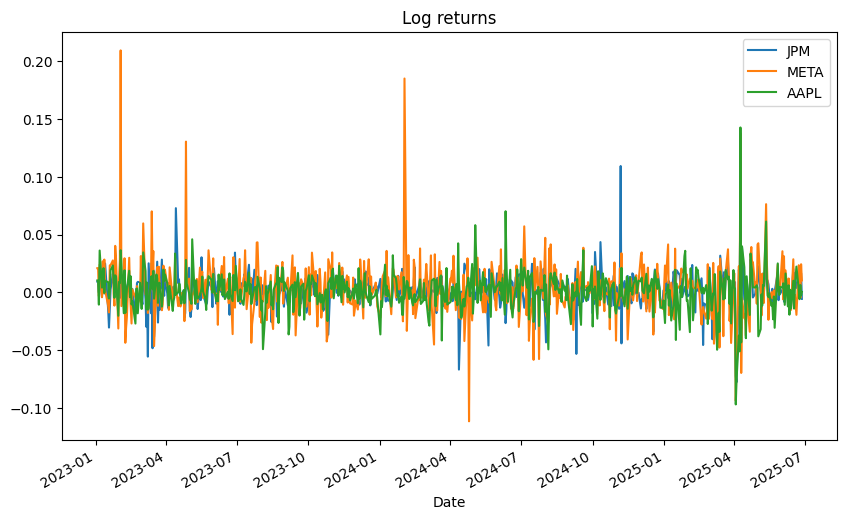

,count,mean,std,min,25%,50%,75%,max
JPM,623.0,0.001328,0.014904,-0.077787,-0.005399,0.001973,0.008747,0.109254
META,623.0,0.002886,0.024038,-0.111617,-0.009277,0.001686,0.014007,0.209308
AAPL,623.0,0.000799,0.016510,-0.097013,-0.007026,0.001578,0.008963,0.142617


In [6]:
log_returns = np.log(prices).diff().fillna(method ='bfill')

log_returns.plot(title='Log returns', figsize=(10, 6))
import matplotlib.pyplot as plt
plt.show()

log_returns.describe().T

## 2) First-window modeling: VaR, ES, and distributions

Use the first estimation window W (weeks) on each asset separately with losses L = −R.
Compare: 

- historical,
- Gaussian,
- Student-t,
- AR(p)+GARCH(1,1) with Normal/Student-t,
- Filtered Historical Simulation (FHS).

In [ ]:
# TODO

# for the gaussian/student-t fitting, you can use
# stats.norm.fit(data) / stats.t.fit(data)

## 3) Rolling-window backtesting of VaR and ES

Use a rolling window of size W to produce 1-step-ahead VaR/ES at 95% and 99% for each method in Exercise 2. Then, implement the following statistical tests:

- VaR backtests: Kupiec POF and Christoffersen independence tests.
- ES backtest: Acerbi–Székely Z1 test.

In [ ]:
# TODO

# Unfortunately, it seems like there is no direct implementation of such tests in Python.
# Look better into this, or implement them yourself.

## 4) Copula fitting (first window)

1. Visualize dependence in returns and copula space using pseudo-observations.
2. Fit Gaussian and t copulas; report parameters.
3. Simulate from fitted copulas and map to empirical marginals; compare with original returns.

In [ ]:
# TODO

# Use copulae package for copula fitting and sampling
# cop = copulae.elliptical.GaussianCopula(dim=len(TICKERS))
# cop.fit(data)
# samples = cop.random(n)

## 5) Portfolio VaR/ES with copulas (rolling)

Equal-weighted portfolio of AAPL, MSFT, JPM. Compare univariate models (as in Exercise 3) vs copula-based VaR/ES with rolling windows.

At each time, fit copulas on last W weeks, simulate N scenarios, estimate VaR/ES from simulated portfolio returns, then backtest.

In [ ]:
# TODO